In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
df=pd.read_excel("data6.xlsx")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,concave points_se
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.01587
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.01340
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.02058
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.01867
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.01885


In [13]:
from sklearn.preprocessing import LabelEncoder
le_diagnosis=LabelEncoder()
df["diagno_n"]=le_diagnosis.fit_transform(df["diagnosis"])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(["id","diagno_n","diagnosis"],axis=1),df.diagno_n,train_size=0.8)
from sklearn import tree
model=tree.DecisionTreeClassifier(min_samples_split=100,min_samples_leaf=100)
model.fit(x_train,y_train)
df.head()

C:\Users\ARIJIT ROYCHAUDHURY\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,concave points_se,diagno_n
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.01587,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.01340,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.02058,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.01867,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.01885,1


In [14]:
print("classification score :",model.score(x_test,y_test))

classification score : 0.8771929824561403


In [15]:
y_pred=model.predict(x_test)
print("classification accuracy is :",metrics.accuracy_score(y_test,y_pred))

classification accuracy is : 0.8771929824561403


In [16]:
print(metrics.confusion_matrix(y_test,y_pred))

[[66  6]
 [ 8 34]]


In [17]:
cn=metrics.confusion_matrix(y_test,y_pred)
t_p=cn[1,1]
t_n=cn[0,0]
f_p=cn[0,1]
f_n=cn[1,0]
print("True_positive:",t_p)
print("False_positive:",f_p)
print("True_negative:",t_n)
print("False_negative:",f_n)

True_positive: 34
False_positive: 6
True_negative: 66
False_negative: 8


In [18]:
print("classification accuracy:",(t_p+t_n)/float(t_p+t_n+f_p+f_n))
print(" classification error:",(f_p+f_n)/float(t_p+t_n+f_p+f_n))
print("Sensitivity: ",t_p/float(f_n+t_p))
print("Specificity: ",t_n/(t_n+f_p))
print("Precision :",t_p/(t_p+f_p))
print("false positive rate:",f_p/(f_p+t_n))

classification accuracy: 0.8771929824561403
 classification error: 0.12280701754385964
Sensitivity:  0.8095238095238095
Specificity:  0.9166666666666666
Precision : 0.85
false positive rate: 0.08333333333333333


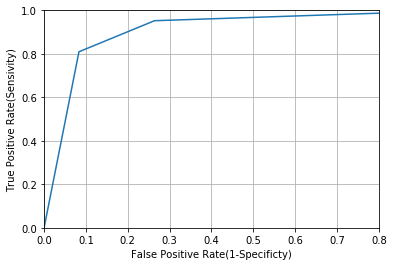

In [19]:
probas_ =model.fit(x_train, y_train).predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probas_[:, 1])
roc_auc = metrics.auc(fpr, tpr)
plt.xlim(0,0.8)
plt.ylim(0,1)
plt.grid(True)
plt.ylabel("True Positive Rate(Sensivity)")
plt.xlabel("False Positive Rate(1-Specificty)")
plt.plot(fpr,tpr,label='(AUC = %0.2f)' % (roc_auc))

In [20]:
print(roc_auc)

0.9113756613756614


In [21]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,concave points_se,diagno_n
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.011796,0.372583
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.006170,0.483918
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.000000,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.007638,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.010930,0.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.014710,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,0.052790,1.000000
